# Classification of Income

In this, we'll mainly see how to use XGBoost Classifier 

1. import XGBClassifier
2. import plot_tree, plot_importance
3. creating a classification model
4. plotting how the model trains
5. plotting the tree
6. measuring accuracy

Apart from these, the following are also covered - 

1. Loading data using CSV
2. setting na_values & handling missing values
3. various operations on the data (merge, replace etc.)
4. encoding data, binary encoder (for many categories)
5. train test split
6. building the model
7. training and testing the model

In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from xgboost import plot_tree, plot_importance

%matplotlib inline

In [2]:
# describing the data

cols = ['age', 'work-class', 'fnlwgt', 'education', 'education-num', 'marital-status', 
            'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
            'hrs-per-week', 'native-country', 'income']


In [3]:
# data has got missing values in the format ' ?'
# these will be treated as nan

data = pd.read_csv('income.csv', header=None, names=cols, na_values=" ?")

print(data.shape)
data.head(n = 7)

(48842, 15)


,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


In [4]:
data.dtypes

age                int64
work-class        object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hrs-per-week       int64
native-country    object
income            object
dtype: object

In [5]:
data.describe(include='all')

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,native-country,income
count,48842.000000,46043,4.884200e+04,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,4
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,24720
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### Handling missing values

In [6]:
## finding NaN values
print(data[data.isnull().any(axis=1)].count())
print(data.isnull().values.sum())
data = data.dropna(axis = 0)
print(data.shape)


age               3620
work-class         821
fnlwgt            3620
education         3620
education-num     3620
marital-status    3620
occupation         811
relationship      3620
race              3620
sex               3620
capital-gain      3620
capital-loss      3620
hrs-per-week      3620
native-country    2763
income            3620
dtype: int64
6465
(45222, 15)


### Converting income and sex columns to categorical data

In [7]:
data['income'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [8]:
data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [9]:
## classifying the data beginning with the simplest ones
# Income: map >50K: 1, <=50K: 0
data['income'] = data['income'].map({' <=50K': 0, ' <=50K.': 0, ' >50K': 1, ' >50K.': 1})

# Sex: map Male: 1, Female: 0
data['sex'] = data['sex'].map({' Male': 1, ' Female': 0})
# data['sex'].astype('int32')


In [10]:
data[15:20]

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,native-country,income
16,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,1,0,0,35,United-States,0
17,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,1,0,0,40,United-States,0
18,38,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,1,0,0,50,United-States,0
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,0,0,0,45,United-States,1
20,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,1,0,0,60,United-States,1


In [11]:
data['work-class'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [12]:
##  Replace Without pay with 'Unpayed'
data['work-class'] = data['work-class'].replace([' Without-pay', ' Never-worked'], 'Unpayed')
print(data['work-class'].value_counts().count())

data['work-class'].unique()


7


array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', 'Unpayed'], dtype=object)

### Label encoding

In [13]:
data['work-class'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', 'Unpayed'], dtype=object)

In [14]:
data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [15]:
## Not many different categories so will use Label Encoding
labels = data['work-class'].astype('category').cat.categories.tolist()
mapping = {'work-class': {k: v for k, v in zip(labels, list(range(1, len(labels)+1)))}}

data.replace(mapping, inplace = True)

data.head(7)


,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,native-country,income
0,39,6,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,5,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,3,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,3,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,3,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
5,37,3,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,United-States,0
6,49,3,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,0,0,0,16,Jamaica,0


In [16]:
data = data.drop(columns = ['education-num'], axis = 1)
print(data['education'].value_counts())

data.head(2)


 HS-grad         14783
 Some-college     9899
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64


,age,work-class,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,native-country,income
0,39,6,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,5,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0


In [17]:
data['education'] = data['education'].replace([' 10th', ' 11th', ' 12th'], 'HS-Student')
data['education'] = data['education'].replace([' 7th-8th', ' 9th'], 'Mid-Student')
data['education'] = data['education'].replace([' 5th-6th', ' 1st-4th'], 'Elem-Student')

print(data['education'].value_counts())


 HS-grad         14783
 Some-college     9899
 Bachelors        7570
HS-Student        3419
 Masters          2514
 Assoc-voc        1959
 Assoc-acdm       1507
Mid-Student       1499
 Prof-school       785
Elem-Student       671
 Doctorate         544
 Preschool          72
Name: education, dtype: int64


In [18]:
labels = data['education'].astype('category').cat.categories.tolist()
mapping = {'education': {k: v for k, v in zip(labels, list(range(1, len(labels)+1)))}}

data.replace(mapping, inplace = True)

data.head(7)


,age,work-class,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,native-country,income
0,39,6,77516,3,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,5,83311,3,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,3,215646,5,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,3,234721,11,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,3,338409,3,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
5,37,3,284582,6,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,United-States,0
6,49,3,160187,12,Married-spouse-absent,Other-service,Not-in-family,Black,0,0,0,16,Jamaica,0


In [19]:
labels = data['marital-status'].astype('category').cat.categories.tolist()
mapping = {'marital-status': {k: v for k, v in zip(labels, list(range(1, len(labels)+1)))}}
data.replace(mapping, inplace = True)

labels = data['relationship'].astype('category').cat.categories.tolist()
mapping = {'relationship': {k: v for k, v in zip(labels, list(range(1, len(labels)+1)))}}
data.replace(mapping, inplace = True)

labels = data['race'].astype('category').cat.categories.tolist()
mapping = {'race': {k: v for k, v in zip(labels, list(range(1, len(labels)+1)))}}
data.replace(mapping, inplace = True)

data.head(7)


,age,work-class,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,native-country,income
0,39,6,77516,3,5,Adm-clerical,2,5,1,2174,0,40,United-States,0
1,50,5,83311,3,3,Exec-managerial,1,5,1,0,0,13,United-States,0
2,38,3,215646,5,1,Handlers-cleaners,2,5,1,0,0,40,United-States,0
3,53,3,234721,11,3,Handlers-cleaners,1,3,1,0,0,40,United-States,0
4,28,3,338409,3,3,Prof-specialty,6,3,0,0,0,40,Cuba,0
5,37,3,284582,6,3,Exec-managerial,6,5,0,0,0,40,United-States,0
6,49,3,160187,12,4,Other-service,2,3,0,0,0,16,Jamaica,0


In [20]:
## Occupation & Nativity have many categories > Binary Encode
encoder = ce.BinaryEncoder(cols = ['occupation', 'native-country'])
data = encoder.fit_transform(data)

data.head(7)

,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,...,fnlwgt,education,marital-status,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,income
0,0,0,0,0,1,0,0,0,0,0,...,77516,3,5,2,5,1,2174,0,40,0
1,0,0,0,1,0,0,0,0,0,0,...,83311,3,3,1,5,1,0,0,13,0
2,0,0,0,1,1,0,0,0,0,0,...,215646,5,1,2,5,1,0,0,40,0
3,0,0,0,1,1,0,0,0,0,0,...,234721,11,3,1,3,1,0,0,40,0
4,0,0,1,0,0,0,0,0,0,0,...,338409,3,3,6,3,0,0,0,40,0
5,0,0,0,1,0,0,0,0,0,0,...,284582,6,3,6,5,0,0,0,40,0
6,0,0,1,0,1,0,0,0,0,0,...,160187,12,4,2,3,0,0,0,16,0


In [21]:
labels = data['income']
features = data.drop(columns = ['income'], axis = 1)

labels.head(n = 5)
features.head(n = 5)


,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,...,work-class,fnlwgt,education,marital-status,relationship,race,sex,capital-gain,capital-loss,hrs-per-week
0,0,0,0,0,1,0,0,0,0,0,...,6,77516,3,5,2,5,1,2174,0,40
1,0,0,0,1,0,0,0,0,0,0,...,5,83311,3,3,1,5,1,0,0,13
2,0,0,0,1,1,0,0,0,0,0,...,3,215646,5,1,2,5,1,0,0,40
3,0,0,0,1,1,0,0,0,0,0,...,3,234721,11,3,1,3,1,0,0,40
4,0,0,1,0,0,0,0,0,0,0,...,3,338409,3,3,6,3,0,0,0,40


### Train test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print(X_train.shape)
print(X_test.shape)


(33916, 23)
(11306, 23)


In [23]:
y_train.isnull().sum()

0

In [24]:
y_train.isnull().sum()

0

In [25]:
print(data[data.isnull().any(axis=1)].count())

data.isnull().values.sum()

occupation_0        0
occupation_1        0
occupation_2        0
occupation_3        0
occupation_4        0
native-country_0    0
native-country_1    0
native-country_2    0
native-country_3    0
native-country_4    0
native-country_5    0
native-country_6    0
age                 0
work-class          0
fnlwgt              0
education           0
marital-status      0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hrs-per-week        0
income              0
dtype: int64


0

In [26]:
model = XGBClassifier()
model.fit(X_train, y_train)
model


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [27]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]
%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)


[0]	validation_0-auc:0.840532	validation_0-error:0.187758	validation_1-auc:0.84765	validation_1-error:0.17672
[1]	validation_0-auc:0.840536	validation_0-error:0.187758	validation_1-auc:0.847665	validation_1-error:0.17672
[2]	validation_0-auc:0.840536	validation_0-error:0.187758	validation_1-auc:0.847665	validation_1-error:0.17672
[3]	validation_0-auc:0.844854	validation_0-error:0.187758	validation_1-auc:0.85163	validation_1-error:0.176632
[4]	validation_0-auc:0.850156	validation_0-error:0.188937	validation_1-auc:0.856234	validation_1-error:0.190607
[5]	validation_0-auc:0.852761	validation_0-error:0.170922	validation_1-auc:0.858479	validation_1-error:0.163099
[6]	validation_0-auc:0.854834	validation_0-error:0.170922	validation_1-auc:0.860761	validation_1-error:0.163099
[7]	validation_0-auc:0.854995	validation_0-error:0.170922	validation_1-auc:0.860927	validation_1-error:0.163099
[8]	validation_0-auc:0.858958	validation_0-error:0.172603	validation_1-auc:0.863936	validation_1-error:0.1706

[73]	validation_0-auc:0.913022	validation_0-error:0.141497	validation_1-auc:0.914817	validation_1-error:0.140987
[74]	validation_0-auc:0.913003	validation_0-error:0.141497	validation_1-auc:0.914806	validation_1-error:0.141076
[75]	validation_0-auc:0.913226	validation_0-error:0.141261	validation_1-auc:0.915059	validation_1-error:0.14081
[76]	validation_0-auc:0.913425	validation_0-error:0.141438	validation_1-auc:0.915118	validation_1-error:0.141164
[77]	validation_0-auc:0.913618	validation_0-error:0.141113	validation_1-auc:0.915279	validation_1-error:0.140987
[78]	validation_0-auc:0.913817	validation_0-error:0.140583	validation_1-auc:0.91536	validation_1-error:0.140633
[79]	validation_0-auc:0.914073	validation_0-error:0.140376	validation_1-auc:0.915615	validation_1-error:0.140456
[80]	validation_0-auc:0.914197	validation_0-error:0.14073	validation_1-auc:0.915758	validation_1-error:0.14028
[81]	validation_0-auc:0.914359	validation_0-error:0.140347	validation_1-auc:0.915837	validation_1-er

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [28]:
# created df with this data

df = pd.read_csv('xgboost_metrics.txt', index_col=None)
df.head()

,Time,ValAuc0,ValErr0,ValAuc1,ValErr1
0,0,0.840532,0.187758,0.847650,0.176720
1,1,0.840536,0.187758,0.847665,0.176720
2,2,0.840536,0.187758,0.847665,0.176720
3,3,0.844854,0.187758,0.851630,0.176632
4,4,0.850156,0.188937,0.856234,0.190607


In [29]:
df.columns = ['Time', 'ValAuc0', 'ValErr0', 'ValAuc1', 'ValErr1']

In [30]:
df.describe()

,Time,ValAuc0,ValErr0,ValAuc1,ValErr1
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.901283,0.151181,0.904014,0.148126
std,29.011492,0.018885,0.012679,0.017609,0.011277
min,0.000000,0.840532,0.138430,0.847650,0.137184
25%,24.750000,0.897053,0.141482,0.899950,0.141054
50%,49.500000,0.908111,0.147039,0.910751,0.142447
75%,74.250000,0.913073,0.158576,0.914878,0.154276
max,99.000000,0.917587,0.188937,0.918747,0.190607


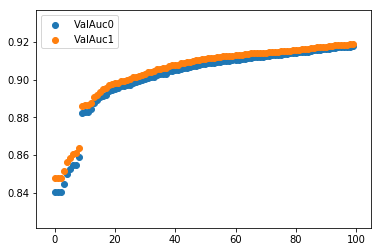

In [31]:
plt.scatter(df['Time'], df['ValAuc0'] )
plt.scatter(df['Time'], df['ValAuc1'] )

plt.legend()

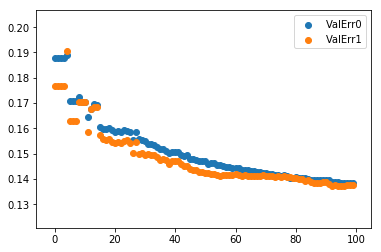

In [32]:
plt.scatter(df['Time'], df['ValErr0'] )
plt.scatter(df['Time'], df['ValErr1'] )

plt.legend()

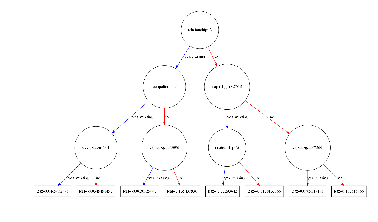

In [33]:
plot_tree(model, num_trees=5, rankdir='UT')


In [34]:
y_train_pred = model.predict(X_train)
train_pred = [round(value) for value in y_train_pred]

train_accuracy = accuracy_score(y_train, train_pred)
print('Train Accuracy: ', train_accuracy)


Train Accuracy:  0.8615402759759405


E:\Python\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [35]:
y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.8622855121174597


E:\Python\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [36]:
model.feature_importances_

array([0.        , 0.01873199, 0.00720461, 0.01008646, 0.02737752,
       0.        , 0.        , 0.        , 0.        , 0.00576369,
       0.00288184, 0.        , 0.15850145, 0.04610951, 0.04899136,
       0.12247839, 0.07492796, 0.09654178, 0.00576369, 0.01440922,
       0.15850145, 0.11959654, 0.08213256], dtype=float32)

<BarContainer object of 23 artists>

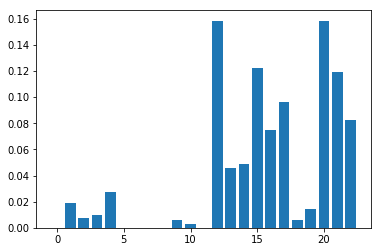

In [37]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)

In [38]:
def my_plot_importance(booster, figsize, **kwargs): 
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

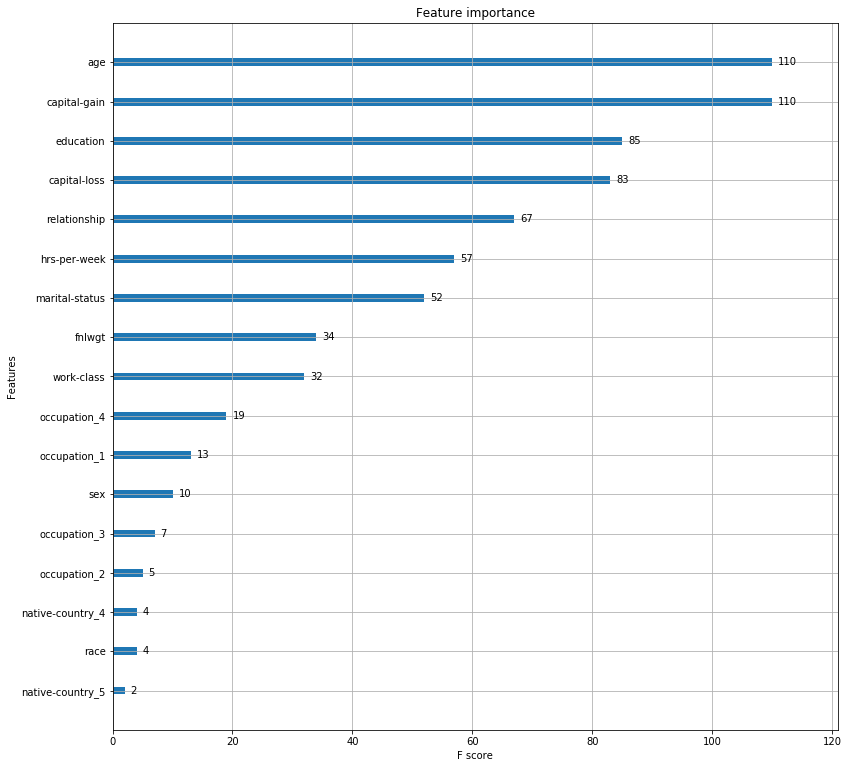

In [39]:
my_plot_importance(model, figsize=(13,13))

In [40]:
pd.crosstab(y_train, y_train_pred)

col_0,0,1
income,,
0,24251,1307
1,3389,4969


In [41]:
pd.crosstab(y_test, y_test_pred)

col_0,0,1
income,,
0,8051,405
1,1152,1698


In [42]:
pd.crosstab(y_train, y_train_pred, normalize='index').round(4)*100

col_0,0,1
income,,
0,94.89,5.11
1,40.55,59.45


In [43]:
pd.crosstab(y_test, y_test_pred, normalize='index').round(4)*100

col_0,0,1
income,,
0,95.21,4.79
1,40.42,59.58
